In [112]:
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')

In [113]:
df1 = pd.read_csv("../data/bouldering_data.csv")

C:\Users\mattb\AppData\Local\Temp\ipykernel_11144\3260189768.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fig = subset_frame.pivot(*subset_frame).plot(kind = 'bar', stacked = True, colormap="viridis", alpha=0.8).get_figure()


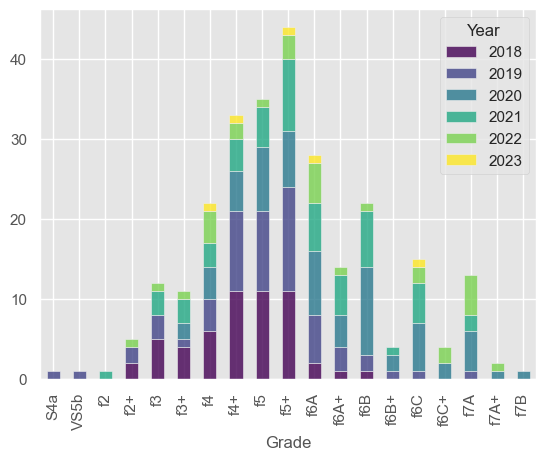

In [114]:
def gradesbyyear(frame):
    subset_frame = frame.loc[:, ("Grade", "Date")]
    subset_frame['Date'] = pd.to_datetime(subset_frame['Date'])
    subset_frame['Year'] = subset_frame['Date'].dt.year
    subset_frame.drop(columns='Date')
    subset_frame = subset_frame.groupby(["Grade","Year"]).size().reset_index(name='counts')    
    fig = subset_frame.pivot(*subset_frame).plot(kind = 'bar', stacked = True, colormap="viridis", alpha=0.8).get_figure()
    fig.savefig("../graphs/gradesbyyear.png")
gradesbyyear(df1)

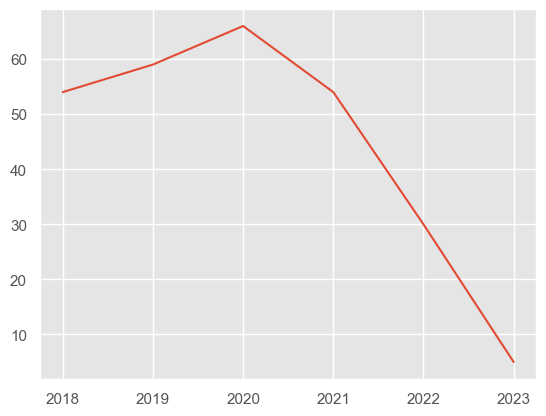

In [115]:
def climbsbyyear(frame):
    subset_frame = frame.loc[:, "Date"]
    subset_frame = pd.to_datetime(subset_frame)
    subset_frame = subset_frame.dt.year
    subset_frame = subset_frame.value_counts() 
    subset_frame = subset_frame.sort_index(ascending=False)
    fig = subset_frame.plot().get_figure()
    fig.savefig("../graphs/climbsbyyear.png")
climbsbyyear(df1)

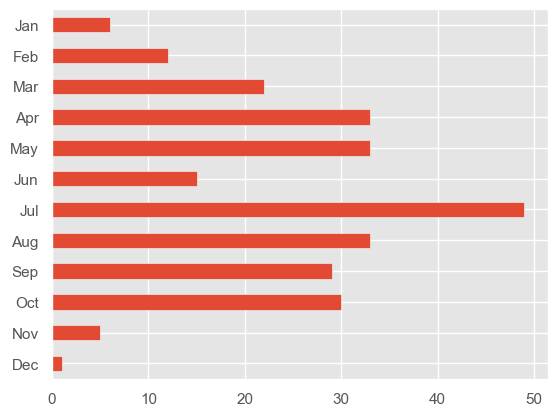

In [116]:
def climbsbymonth(frame):
    subset_frame = frame.loc[:, "Date"]
    subset_frame = pd.to_datetime(subset_frame)
    subset_frame = subset_frame.dt.strftime('%b')
    subset_frame = subset_frame.value_counts() 
    cats = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
    subset_frame.index = pd.CategoricalIndex(subset_frame.index, categories=cats, ordered=True)
    subset_frame = subset_frame.sort_index(ascending=False)
    fig = subset_frame.plot(kind = "barh").get_figure()
    fig.savefig("../graphs/climbsbymonth.png")
climbsbymonth(df1)